In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21
from classy import Class
from scipy.special import spherical_jn
from zeus21.cosmology import growth, dgrowth_dz, Hub

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [2]:
ClassCosmo = Class()
params = {'output': 'mPk',
          'n_s': 0.965, 
          'H0': 67.4,
          'omega_b': 0.0224,
          'omega_cdm': 0.12,
          'tau_reio': 0.054,
          'sigma8': 0.811,
          'P_k_max_1/Mpc': 10}
ClassCosmo.set(params)
ClassCosmo.compute()

In [3]:
UserParams = zeus21.User_Parameters(precisionboost=1.2)
CosmoParams_input = zeus21.Cosmo_Parameters_Input()
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)

In [5]:
k_zeus = CorrFClass._klistCF
pk_zeus = CorrFClass._PklinCF

In [6]:
# Calculate velocity power spectrum
# P_vv(k) = (aHf)^2 * P_matter(k) / k^2
Omega_m = CosmoParams.OmegaM
z = 0.0  # Redshift
a = 1.0 / (1.0 + z)  # Scale factor
H = Hub(CosmoParams, z)  # Hubble parameter in km/s/Mpc
f = Omega_m**0.545  # Growth rate approximation
aHf = a * H * f

In [13]:
aHf**2

np.float64(1282.3102209450853)

In [9]:
r_list = CorrFClass.rlist_CF
CF_v = aHf**2 * CorrFClass.xi_RR_CF_v

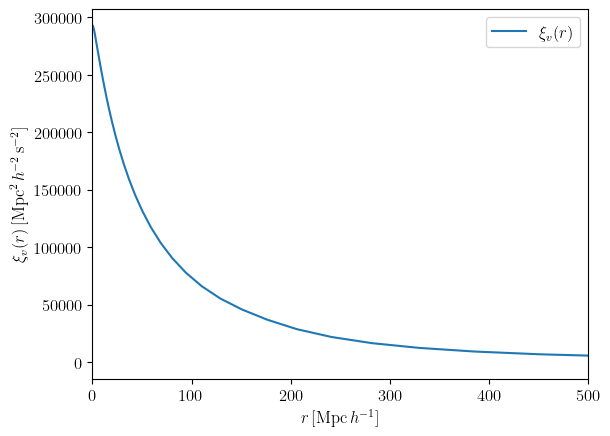

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(r_list, CF_v[0, 0, :], label=r'$\xi_v(r)$')
ax.set_xlabel(r'$r\,[\mathrm{Mpc}\,h^{-1}]$')
ax.set_ylabel(r'$\xi_v(r)\,[\mathrm{Mpc}^2\,h^{-2}\,\mathrm{s}^{-2}]$')
ax.set_xlim(0, 500)
ax.legend()

In [14]:
Omega_l = CosmoParams.OmegaL
f_lahav = Omega_m**(4/7) + (1 + Omega_m / 2) * Omega_l / 70
print(f, f_lahav)

0.5280837546716213 0.5233682672241158
